In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("../data/raw_data/LAPD_RIPA_DATA.csv", encoding = 'unicode_escape', engine ='python')

In [3]:
df.keys()

Index(['stopID', 'stopDateTime', 'stopDuration', 'stopInResponseToCFS',
       'street', 'actionTakenDuringStop', 'personSearchConsentGiven',
       'propertySearchConsentGiven', 'perceivedRace', 'reasonForStop',
       'perceivedOrKnownDisability', 'perceivedLimitedEnglish', 'perceivedAge',
       'perceivedGender', 'perceivedLgbt', 'genderNonconforming',
       'resultOfStop', 'basisForSearch', 'contrabandOrEvidenceDiscovered'],
      dtype='object')

In [4]:
df.iloc[0].stopDateTime

'2022-01-02 19:11:28'

In [5]:
df["stopDateTime"] = pd.to_datetime(df["stopDateTime"], format="%Y-%m-%d %H:%M:%S")

In [6]:
std_cols = {"stopID": "stop_id",
            "stopDateTime": "date_time",
            "stopDuration": "duration",
            "stopInResponseToCFS": "call_for_service",
           "street": "location",
           "actionTakenDuringStop": "actions_taken",
           "personSearchConsentGiven": "person_search_consent",
           "propertySearchConsentGiven": "property_search_consent",
           "perceivedRace": "race",
           "reasonForStop": "reason_for_stop",
           "perceivedOrKnownDisability": "disabilities",
            "perceivedLimitedEnglish": "limited_english",
            "perceivedAge": "age",
            "perceivedGender": "gender",
            "perceivedLgbt": "lgbt",
            "genderNonConforming": "gender_nonconforming",
            "resultOfStop": "result",
            "basisForSearch": "basis_for_search",
            "contrabandOrEvidenceDiscovered": "evidence_found"
           }

In [7]:
df.rename(columns=std_cols, inplace="True")

In [8]:
df.keys()

Index(['stop_id', 'date_time', 'duration', 'call_for_service', 'location',
       'actions_taken', 'person_search_consent', 'property_search_consent',
       'race', 'reason_for_stop', 'disabilities', 'limited_english', 'age',
       'gender', 'lgbt', 'genderNonconforming', 'result', 'basis_for_search',
       'evidence_found'],
      dtype='object')

In [9]:
import integrity.compliance as comp

In [10]:
comp.verbose_checks(df)

All required fields exist: FAIL
   Missing fields: {'property_seized'}
   Extra fields:   {'genderNonconforming', 'property_search_consent', 'person_search_consent'}
All stops unique: FAIL
   Total records:   1533
   Unique stop_ids: 738
   Unique records:  1532
   Duplicate stop_ids: [3114 3118 3126 3133 3133 3133 3133 3133 3133 3133 3140 3140 3140 3140
 3140 3140 3140 3140 3140 3140 3140 3140 3140 3140 3140 3140 3140 3140
 3140 3140 3140 3140 3140 3140 3140 3140 3140 3140 3140 3140 3140 3140
 3140 3140 3140 3166 3166 3166 3166 3166 3166 3166 3166 3166 3166 3166
 3166 3166 3166 3166 3166 3166 3166 3166 3166 3166 3166 3166 3176 3177
 3177 3177 3177 3177 3177 3177 3177 3177 3177 3177 3177 3177 3177 3177
 3177 3177 3177 3177 3177 3177 3177 3177 3177 3177 3177 3177 3177 3177
 3177 3177 3177 3177 3177 3177 3177 3177 3177 3177 3177 3177 3177 3177
 3177 3177 3177 3177 3177 3177 3177 3177 3177 3177 3177 3177 3177 3177
 3177 3177 3177 3177 3177 3177 3177 3177 3177 3177 3177 3177 3177 3177
 317

False

In [11]:
dup_stops = np.unique(df[df["stop_id"].duplicated(keep=False)]["stop_id"].values)
individuals = [comp.count_individuals(df[df["stop_id"] == id].copy()) for id in dup_stops]

In [12]:
print("In {} stops with multiple records, {} individuals appear to be involved".format(len(dup_stops), sum(individuals)))
single_stops = len(df.drop_duplicates(subset="stop_id", keep=False))
print("Combined with the {} stops with only 1 record, that means {} people were likely stopped.".format(single_stops, single_stops+sum(individuals)))

In 72 stops with multiple records, 89 individuals appear to be involved
Combined with the 666 stops with only 1 record, that means 755 people were likely stopped.


In [13]:
df_uniq = df.drop_duplicates(subset="stop_id", keep="first")

In [14]:
import integrity.temporal as tp

Sufficient time duration: FAIL
    First stop: 2022-01-02 19:11:28
    Last stop:  2022-06-26 15:06:53
    Duration of data set: 174 days 19:55:25
Stops are in proper time order: FAIL
Check for unexpected data gaps: FAIL
Index:   Duration:
15:  1 days 21:45:14,   2022-01-04 07:09:46 to 2022-01-06 04:55:00
18:  1 days 15:16:20,   2022-01-06 05:20:00 to 2022-01-07 20:36:20
22:  3 days 17:12:00,   2022-01-07 20:30:00 to 2022-01-11 13:42:00
39:  3 days 01:16:37,   2022-01-13 16:48:03 to 2022-01-16 18:04:40
41:  1 days 12:19:09,   2022-01-16 20:32:51 to 2022-01-18 08:52:00
102:  1 days 14:04:40,   2022-01-24 19:26:18 to 2022-01-26 09:30:58
137:  2 days 00:37:42,   2022-01-28 08:37:00 to 2022-01-30 09:14:42
308:  1 days 03:19:11,   2022-01-31 17:31:40 to 2022-02-01 20:50:51
327:  1 days 04:24:27,   2022-02-05 11:48:00 to 2022-02-06 16:12:27
377:  1 days 12:20:49,   2022-02-06 21:19:11 to 2022-02-08 09:40:00
466:  1 days 00:05:20,   2022-02-17 09:18:00 to 2022-02-18 09:23:20
648:  1 days 04:4

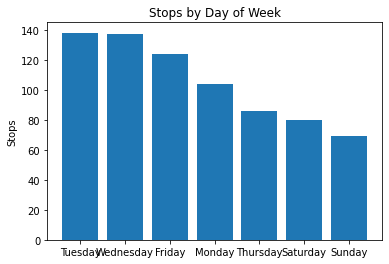

Weekdays with excessive stops: Index(['Tuesday', 'Wednesday', 'Sunday'], dtype='object')



False

In [15]:
tp.verbose_checks(df_uniq)

In [16]:
import plotting.lare_matplot as lmp

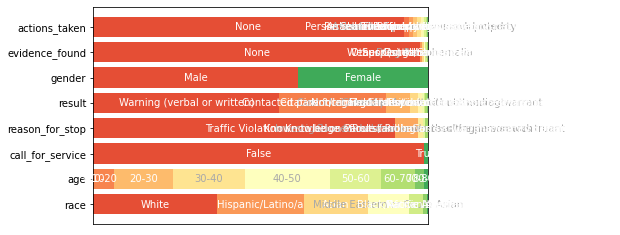

In [17]:
lmp.plot_descriptive_bars(df_uniq)

In [18]:
import analysis.populations as pop

In [19]:
la_pop = pop.get_population("Los Altos")

In [27]:
la_pop

White                            17735.000000
Hispanic/Latino/a                 1357.000000
Asian                             6963.059055
Middle Eastern or South Asian     2622.940945
Black/African American             145.000000
Pacific Islander                     0.000000
Native American                     24.000000
Multiple                          1567.000000
Other                              100.000000
dtype: float64

In [20]:
(df_uniq["race"].value_counts()/la_pop)/(df_uniq["race"].value_counts()["White"]/la_pop["White"])

Asian                             1.315490
Black/African American           13.888720
Hispanic/Latino/a                 9.143702
Middle Eastern or South Asian     2.229064
Multiple                               NaN
Native American                   5.413614
Other                                  NaN
Pacific Islander                       inf
White                             1.000000
dtype: float64

In [21]:
print("White people are stopped {} times per 6 months in Los Altos.".format((df_uniq["race"].value_counts()["White"]/la_pop["White"])))

White people are stopped 0.015393290104313504 times per 6 months in Los Altos.


In [22]:
import analysis.ratios as rat

In [23]:
whites = rat.add_races(df_uniq, ['White'])
black_hispanic = rat.add_races(df_uniq, ['Black/African American', 'Hispanic/Latino/a'])

In [24]:
rat.generate_relative_df(whites, black_hispanic, "White", "Black/Hispanic")

/home/brian/.local/lib/python3.10/site-packages/scipy/stats/_discrete_distns.py:69: RuntimeWarning: divide by zero encountered in _binom_pdf
  return _boost._binom_pdf(x, n, p)


,White,Black/Hispanic,Expected Black/Hispanic,Relative,Odds
Citation for infraction,77.0,64.0,62.615385,1.022113,0.103082
Contacted parent/legal guardian or other person responsible for the minor,1.0,0.0,0.813187,0.000000,0.014719
Custodial Arrest pursuant to outstanding warrant,6.0,2.0,4.879121,0.409910,0.051371
Custodial Arrest without warrant,2.0,2.0,1.626374,1.229730,0.022026
Field interview card completed,0.0,1.0,0.000000,inf,0.018100
In-field cite and release,4.0,11.0,3.252747,3.381757,0.462084
No Action,23.0,14.0,18.703297,0.748531,0.087060
Noncriminal transport or caretaking transport,1.0,1.0,0.813187,1.229730,0.016376
Psychiatric hold,2.0,0.0,1.626374,0.000000,0.026732
Warning (verbal or written),157.0,127.0,127.670330,0.994750,0.111784


In [25]:
whites = rat.add_races(df_uniq, ['White'], field="actions_taken")
black_hispanic = rat.add_races(df_uniq, ['Black/African American', 'Hispanic/Latino/a'], field="actions_taken")

In [26]:
rat.generate_relative_df(whites, black_hispanic, "White", "Black/Hispanic")

/home/brian/.local/lib/python3.10/site-packages/scipy/stats/_discrete_distns.py:69: RuntimeWarning: divide by zero encountered in _binom_pdf
  return _boost._binom_pdf(x, n, p)


,White,Black/Hispanic,Expected Black/Hispanic,Relative,Odds
Asked for consent to search person,7.0,2.0,5.692308,0.351351,0.072878
Asked for consent to search property,2.0,1.0,1.626374,0.614865,0.019788
Curbside detention,1.0,7.0,0.813187,8.608108,0.524013
Firearm pointed at person,0.0,1.0,0.000000,inf,0.018100
Handcuffed or flex cuffed,1.0,7.0,0.813187,8.608108,0.524013
None,255.0,194.0,207.362637,0.935559,0.882961
Person photographed,1.0,0.0,0.813187,0.000000,0.014719
Person removed from vehicle by order,2.0,4.0,1.626374,2.459459,0.043996
Person removed from vehicle by physical contact,0.0,1.0,0.000000,inf,0.018100
Property was seized,0.0,1.0,0.000000,inf,0.018100
